In [24]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import os
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('nicotine_derivatives_with_predictions.csv')
SMILES = list(data['SMILES'])
LABELS = list(data['Predicted Label'])

In [ ]:
def get_props(data):
    m = Chem.MolFromSmiles(data)
    props = {
        "LogP": Descriptors.MolLogP(m),
        "MW": Descriptors.ExactMolWt(m),
        "TPSA": Descriptors.TPSA(m)
    }
    return props

def smiles_to_pdb(smiles, label, output, file_index):
    m = Chem.MolFromSmiles(smiles)
    m = Chem.AddHs(m)
    AllChem.EmbedMolecule(m)
    AllChem.UFFOptimizeMolecule(m)
    
    label_folder = os.path.join(output, f'{label}')
    os.makedirs(label_folder, exist_ok=True)
    output_file = os.path.join(label_folder, f'derivative_{file_index + 1}.pdb')
    
    Chem.MolToPDBFile(m, output_file)
    print(f"succesfully saved {output_file}")


In [21]:
all_props = pd.DataFrame(list(data['SMILES'].apply(get_props)))
all_props['prediction'] = data['Predicted Label']
all_props.to_csv("derivative_properties.csv", index=False)

In [ ]:
output = 'pdbs'

for i, (smiles, label) in enumerate(zip(SMILES, LABELS)):
    smiles_to_pdb(smiles, label, output, i)

succesfully saved pdbs/1/derivative_1.pdb
succesfully saved pdbs/1/derivative_2.pdb
succesfully saved pdbs/1/derivative_3.pdb
succesfully saved pdbs/1/derivative_4.pdb
succesfully saved pdbs/1/derivative_5.pdb
succesfully saved pdbs/0/derivative_6.pdb
succesfully saved pdbs/1/derivative_7.pdb
succesfully saved pdbs/0/derivative_8.pdb
succesfully saved pdbs/0/derivative_9.pdb
succesfully saved pdbs/1/derivative_10.pdb
succesfully saved pdbs/1/derivative_11.pdb
succesfully saved pdbs/1/derivative_12.pdb
succesfully saved pdbs/1/derivative_13.pdb
succesfully saved pdbs/1/derivative_14.pdb
succesfully saved pdbs/0/derivative_15.pdb
succesfully saved pdbs/1/derivative_16.pdb
succesfully saved pdbs/1/derivative_17.pdb
succesfully saved pdbs/0/derivative_18.pdb
succesfully saved pdbs/1/derivative_19.pdb
succesfully saved pdbs/1/derivative_20.pdb
succesfully saved pdbs/0/derivative_21.pdb
succesfully saved pdbs/0/derivative_22.pdb
succesfully saved pdbs/1/derivative_23.pdb
succesfully saved pd

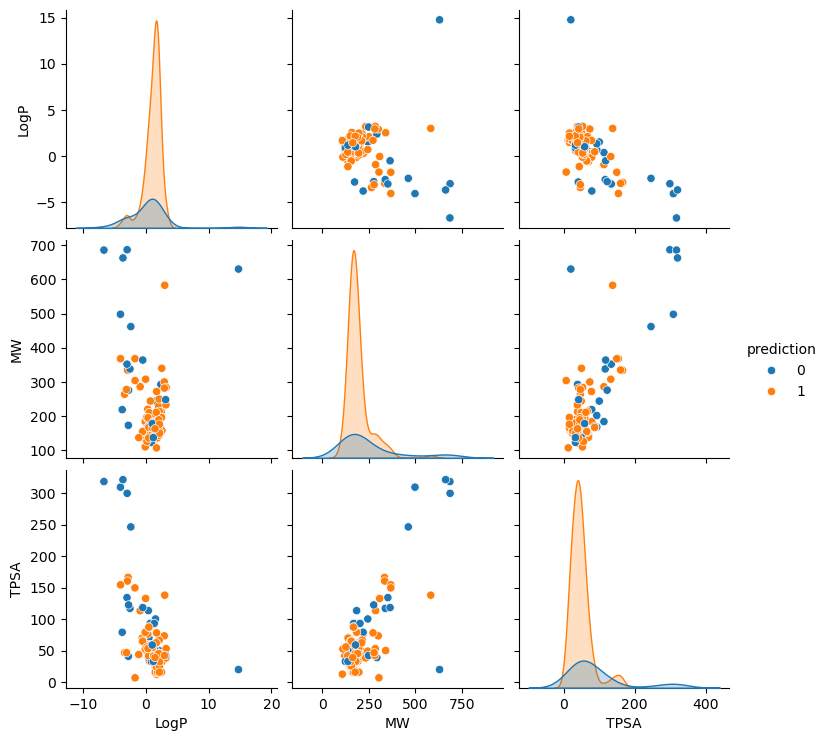

In [39]:
vars=["LogP", "MW", "TPSA"]
sns.pairplot(all_props, vars=vars, hue="prediction", diag_kind="kde")
plt.show()

In [45]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

for var in vars:
    zero = all_props[all_props['prediction'] == 0][var]
    one = all_props[all_props['prediction'] == 1][var]
    print(len(zero), len(one))
    _, shapiro_zero = shapiro(zero)
    _, shapiro_one = shapiro(one)
    if shapiro_zero > 0.05 and shapiro_one > 0.05:
        t, p = ttest_ind(zero, one, equal_var=False)
        print(f"t-test {var}: t = {t:.2f}, p = {p:.2e}")
    else:
        u, p= mannwhitneyu(zero, one, alternative='two-sided')
        print(f"mann-whitney u test {var}: U = {u:.2f}, p = {p:.2e}")


41 123
mann-whitney u test LogP: U = 1797.00, p = 5.96e-03
41 123
mann-whitney u test MW: U = 2854.50, p = 2.07e-01
41 123
mann-whitney u test TPSA: U = 3604.00, p = 3.91e-05
